In [1]:
!pip install vecstack

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# use Pandas to read train.csv
df = pd.read_csv('C:\dataset-0510\okDfPro3_share.csv')
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2) 


from sklearn.utils import shuffle
#打亂資料集後重組
trainDf=df.iloc[0:-10000,:]
testDf=df.iloc[-10000:,:]
trainDf = shuffle(trainDf)
df=pd.concat( [trainDf, testDf])
df.index = range(len(df))
df.head(5)

,building_id,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_area,...,elementary_rate_Int,born_rate_Int,death_rate_Int,marriage_rate_Int,divorce_rate_Int,parking_area_Int,parking_price_Int,land_area_Int,building_area_Int,buyEdu_rate
0,AqhUZS25rJtQdqAO,8,21,19058,5,1,2,7520,2,0.0,...,14.0,737.0,772.0,574.0,239.0,0.0,0.0,15.0,5.0,31.0
1,mZ23AW3dCG9XuC0W,8,13,19853,12,0,2,7459,2,0.0,...,9.0,930.0,653.0,599.0,204.0,0.0,0.0,23.0,19.0,20.0
2,C1MyU36sancbi5om,8,3,19166,7,3,2,10838,2,0.0,...,14.0,604.0,788.0,576.0,278.0,0.0,0.0,15.0,12.0,33.0
3,lbsKRdRRBRDFNXZV,8,21,18712,3,4,2,6149,2,0.0,...,14.0,737.0,772.0,574.0,239.0,0.0,0.0,31.0,6.0,31.0
4,a4zcd3Bok3Vkhgm9,8,10,20234,5,1,2,9498,2,0.0,...,12.0,1081.0,587.0,672.0,269.0,0.0,0.0,16.0,6.0,30.0


In [3]:
from sklearn.preprocessing import StandardScaler
def fieldSelection():
    selectedDF=df[[
        'rich','parking_up','bd_diff','md_diff','dj_rate','floorHigh_rate','land_rich','high_edu',
        'NEW_N_50','NEW_N_500','NEW_N_1000','buildYear','txn_year',
        'CTDisLat_Idx','CTDisLon_Idx','cityDisLat_Idx','cityDisLon_Idx','cityDis_Idx','CTDis_Idx',
        'I_10','I_50','I_100','I_250','I_500','I_1000_Idx','I_5000_Idx','I_10000_Idx',
        'II_10','II_50','II_100','II_250','II_500','II_1000_Idx','II_5000_Idx','II_10000_Idx',
        'III_10','III_50','III_100','III_250','III_500','III_1000_Idx','III_5000_Idx',	'III_10000_Idx',
        'IV_10','IV_50','IV_100','IV_250','IV_500','IV_1000_Idx','IV_5000_Idx','IV_10000_Idx',
        'V_10','V_50','V_100','V_250','V_500','V_1000_Idx','V_5000_Idx','V_10000_Idx',
        'VI_10','VI_50','VI_100','VI_250','VI_500','VI_1000_Idx','VI_5000_Idx','VI_10000_Idx',
        'VII_10','VII_50','VII_100','VII_250','VII_500','VII_1000_Idx','VII_5000_Idx','VII_10000_Idx',
        'VIII_10','VIII_50','VIII_100','VIII_250','VIII_500','VIII_1000_Idx','VIII_5000_Idx','VIII_10000_Idx',
        'IX_10','IX_50','IX_100','IX_250','IX_500','IX_1000_Idx','IX_5000_Idx','IX_10000_Idx',
        'X_10','X_50','X_100','X_250','X_500','X_1000_Idx','X_5000_Idx','X_10000_Idx',
        'XI_10','XI_50','XI_100','XI_250','XI_500','XI_1000_Idx','XI_5000_Idx','XI_10000_Idx',
        'XII_10','XII_50','XII_100','XII_250','XII_500','XII_1000_Idx','XII_5000_Idx','XII_10000_Idx',
        'XIII_10','XIII_50','XIII_100','XIII_250','XIII_500','XIII_1000_Idx','XIII_5000_Idx','XIII_10000_Idx',
        'XIV_10','XIV_50','XIV_100','XIV_250','XIV_500','XIV_1000_Idx','XIV_5000_Idx','XIV_10000_Idx',
        'I_MIN_Idx','II_MIN_Idx','III_MIN_Idx','IV_MIN_Idx','V_MIN_Idx','VI_MIN_Idx','VII_MIN_Idx','VIII_MIN_Idx','IX_MIN_Idx',
        'X_MIN_Idx','XI_MIN_Idx','XII_MIN_Idx','XIII_MIN_Idx','XIV_MIN_Idx','village_income_median_Int','town_population_Int','town_area_Int','town_population_density_Int',
        'doc_rate_Int','master_rate_Int','bachelor_rate_Int','highschool_rate_Int','jobschool_rate_Int','junior_rate_Int','elementary_rate_Int','born_rate_Int','death_rate_Int','marriage_rate_Int',
        'divorce_rate_Int','parking_area_Int','parking_price_Int','land_area_Int','building_area_Int','buyEdu_rate']]
                 
    
    
    oneHotDF=df[['city','total_floor','txn_floor','building_type' ,'building_use' ,'parking_way','building_material']]
    oneHotDF=pd.get_dummies(data=oneHotDF,columns=['city','total_floor','txn_floor','building_type' ,'building_use','parking_way','building_material'])

    scale = StandardScaler() #z-scaler物件
    train_set_scaled = pd.DataFrame(scale.fit_transform(selectedDF.iloc[:,:]),columns=selectedDF.keys()[:])
        
    train_set_scaled[oneHotDF.keys()]=oneHotDF[oneHotDF.keys()]
    train_set_scaled[['df15f12','df15f1','df15f2','df04','istop11','istop10','isf5','isf6','is15']]=df[['df15f12','df15f1','df15f2','df04','istop11','istop10','isf5','isf6','is15']]
    return train_set_scaled

train_set_scaled=fieldSelection()

In [4]:
df.shape

(69333, 355)

In [5]:
train_set_scaled.shape

(69333, 270)

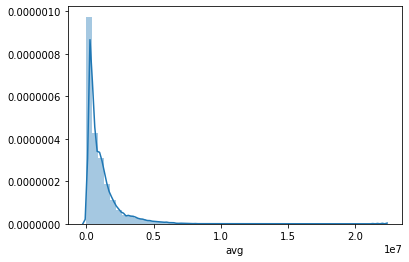

In [6]:
sns.distplot(df.avg)

In [7]:
df['avg_log']=np.log1p(df['avg'])

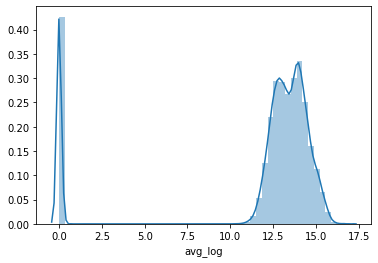

In [8]:
sns.distplot(df.avg_log)

In [9]:
#訓練集為x1,y1     #測試集為tx1,ty1  (ty1目前都是0)
x1=train_set_scaled.iloc[0:-10000,:]
y1=df.iloc[0:-10000,-1]

tx1=train_set_scaled.iloc[-10000:,:]
ty1=df.iloc[-10000:,-1]

In [10]:
x1.shape

(59333, 270)

In [11]:
tx1.shape

(10000, 270)

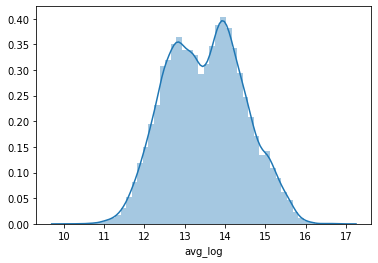

In [12]:
sns.distplot(y1)

## 模型 Model  

In [13]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV,Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble import AdaBoostRegressor
#from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
#from sklearn.tree import ExtraTreeRegressor
from xgboost import XGBRegressor
#from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics

#from sklearn.linear_model import Ridge
#from sklearn.linear_model import Lasso
#from sklearn.linear_model import ElasticNet
import lightgbm as lgb
 
#from sklearn.svm import SVR
#from sklearn.pipeline import make_pipeline
#from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold,GridSearchCV

from sklearn.metrics import accuracy_score
#from sklearn.neighbors import KNeighborsClassifier 
#from sklearn.ensemble import RandomForestClassifier 
from vecstack import stacking
#from sklearn.ensemble import GradientBoostingRegressor

C:\anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


# Stacking的框架中有兩層：
* 第一層由幾種base model組成(1st level model)
* 第二層為一個meta model(2nd level model )

## 第一層

In [14]:
models = [
    
    lgb.LGBMRegressor(objective='regression',learning_rate=0.1,num_leaves=1500),    #1500->5640
    BaggingRegressor(n_estimators=200),                                             #200->5314
    RandomForestRegressor(max_depth=25,min_samples_leaf=2),                        #30,1->4963  25,2->5085
    XGBRegressor(max_depth=20)                                                      #20->5595
    
]
   

In [15]:
#訓練集為x1,y1     #測試集為tx1,ty1  (ty1目前都是0)
X_train = x1
y_train = y1
X_test = tx1
y_test = ty1
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 計分

In [16]:
from math import sqrt
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
             
def mape(targets,predictions): 
    n=len(targets)
    #n=targets.shape[0]
    #return str(round(sum(np.abs((predictions-targets)/targets))/n,2))
    return round(sum(np.abs((predictions-targets)/targets))/n,2)

def hit_rate(targets,predictions):
    n=len(targets)
    diff=np.abs((predictions - targets)/targets)
    z=round(sum(np.where(diff>0.1,0,1))/n,5)
    #return str(z) 
    return z 




In [17]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [18]:
S_train, S_test = stacking(models, X_train, y_train, X_test, 
    regression = True, metric =mean_absolute_error , 
                           n_folds=5,verbose=2)

task:         [regression]
metric:       [mean_absolute_error]
mode:         [oof_pred_bag]
n_models:     [4]

model  0:     [LGBMRegressor]
    fold  0:  [0.13486593]
    fold  1:  [0.13548697]
    fold  2:  [0.13263605]
    fold  3:  [0.13456478]
    fold  4:  [0.13609685]
    ----
    MEAN:     [0.13473012] + [0.00117232]
    FULL:     [0.13473009]

model  1:     [BaggingRegressor]
    fold  0:  [0.14761970]
    fold  1:  [0.14828639]
    fold  2:  [0.14458906]
    fold  3:  [0.14672118]
    fold  4:  [0.14847974]
    ----
    MEAN:     [0.14713921] + [0.00141576]
    FULL:     [0.14713920]

model  2:     [RandomForestRegressor]
    fold  0:  [0.16023032]
    fold  1:  [0.16085481]
    fold  2:  [0.15671929]
    fold  3:  [0.15878825]
    fold  4:  [0.15957397]
    ----
    MEAN:     [0.15923333] + [0.00143232]
    FULL:     [0.15923333]

model  3:     [XGBRegressor]
    fold  0:  [0.13682639]
    fold  1:  [0.13684908]
    fold  2:  [0.13324393]
    fold  3:  [0.13561751]
    fold 

In [44]:
S_pred=pd.DataFrame(S_train)

In [45]:
S_pred.head()

,0,1,2,3
0,12.179720,12.388215,12.445461,12.217583
1,15.117413,15.039270,15.110292,15.206760
2,13.330893,13.207912,13.027001,13.262648
3,12.804901,12.870042,12.651419,12.815362
4,12.451844,12.416181,12.349843,12.489174


In [46]:
S_pred=np.mean(S_pred, axis=1) #平均法
print('MAE: [%.8f]' % mean_absolute_error(y_train, S_pred))

MAE: [0.13625004]


In [47]:
S_pred.head()

0    12.307745
1    15.118434
2    13.207113
3    12.785431
4    12.426761
dtype: float64

In [48]:
M= float(mape(y_train,S_pred))
#H= float(hit_rate(y_train,S_pred)) 
y_train_log=np.expm1(y_train)
S_pred_log=np.expm1(S_pred)
H= float(hit_rate(y_train_log,S_pred_log)) 
print('MAPE: [%.8f]' % M)
print('Hit_Rate: [%.8f]' % H)

print ('競賽評分=' ,(H*10**4)+(1-M))

MAPE: [0.01000000]
Hit_Rate: [0.53523000]
競賽評分= 5353.29


In [43]:
S_train

array([[12.17971982, 12.38821521, 12.44546105, 12.2175827 ],
       [15.11741337, 15.03926972, 15.11029161, 15.20676041],
       [13.33089268, 13.20791189, 13.02700052, 13.26264763],
       ...,
       [13.40719021, 13.50092388, 13.58360702, 13.17732048],
       [14.03954048, 14.0097689 , 13.97891359, 13.96172714],
       [14.36204409, 14.11698572, 14.12943191, 14.34545135]])

In [21]:
#設計DL所要看的特徵
def fieldSelectionDL():
    selectedDF=df[[
        'rich','parking_up','bd_diff','md_diff','dj_rate','floorHigh_rate','land_rich','high_edu',
        'NEW_N_50','NEW_N_500','NEW_N_1000','buildYear','txn_year',
        'CTDisLat_Idx','CTDisLon_Idx','cityDisLat_Idx','cityDisLon_Idx','cityDis_Idx','CTDis_Idx',
        'I_10','I_50','I_100','I_250','I_500','I_1000_Idx','I_5000_Idx','I_10000_Idx',
        'II_10','II_50','II_100','II_250','II_500','II_1000_Idx','II_5000_Idx','II_10000_Idx',
        'III_10','III_50','III_100','III_250','III_500','III_1000_Idx','III_5000_Idx',	'III_10000_Idx',
        'IV_10','IV_50','IV_100','IV_250','IV_500','IV_1000_Idx','IV_5000_Idx','IV_10000_Idx',
        'V_10','V_50','V_100','V_250','V_500','V_1000_Idx','V_5000_Idx','V_10000_Idx',
        'VI_10','VI_50','VI_100','VI_250','VI_500','VI_1000_Idx','VI_5000_Idx','VI_10000_Idx',
        'VII_10','VII_50','VII_100','VII_250','VII_500','VII_1000_Idx','VII_5000_Idx','VII_10000_Idx',
        'VIII_10','VIII_50','VIII_100','VIII_250','VIII_500','VIII_1000_Idx','VIII_5000_Idx','VIII_10000_Idx',
        'IX_10','IX_50','IX_100','IX_250','IX_500','IX_1000_Idx','IX_5000_Idx','IX_10000_Idx',
        'X_10','X_50','X_100','X_250','X_500','X_1000_Idx','X_5000_Idx','X_10000_Idx',
        'XI_10','XI_50','XI_100','XI_250','XI_500','XI_1000_Idx','XI_5000_Idx','XI_10000_Idx',
        'XII_10','XII_50','XII_100','XII_250','XII_500','XII_1000_Idx','XII_5000_Idx','XII_10000_Idx',
        'XIII_10','XIII_50','XIII_100','XIII_250','XIII_500','XIII_1000_Idx','XIII_5000_Idx','XIII_10000_Idx',
        'XIV_10','XIV_50','XIV_100','XIV_250','XIV_500','XIV_1000_Idx','XIV_5000_Idx','XIV_10000_Idx',
        'I_MIN_Idx','II_MIN_Idx','III_MIN_Idx','IV_MIN_Idx','V_MIN_Idx','VI_MIN_Idx','VII_MIN_Idx','VIII_MIN_Idx','IX_MIN_Idx',
        'X_MIN_Idx','XI_MIN_Idx','XII_MIN_Idx','XIII_MIN_Idx','XIV_MIN_Idx','village_income_median_Int','town_population_Int','town_area_Int','town_population_density_Int',
        'doc_rate_Int','master_rate_Int','bachelor_rate_Int','highschool_rate_Int','jobschool_rate_Int','junior_rate_Int','elementary_rate_Int','born_rate_Int','death_rate_Int','marriage_rate_Int',
        'divorce_rate_Int','parking_area_Int','parking_price_Int','land_area_Int','building_area_Int','buyEdu_rate']]
                 
    
    
    oneHotDF=df[['city','lat','lon','total_floor','txn_floor','building_type' ,'building_use' ,'parking_way','building_material']]
    oneHotDF=pd.get_dummies(data=oneHotDF,columns=['city','lat','lon','total_floor','txn_floor','building_type' ,'building_use','parking_way','building_material'])

    scale = StandardScaler() #z-scaler物件
    train_set_scaled = pd.DataFrame(scale.fit_transform(selectedDF.iloc[:,:]),columns=selectedDF.keys()[:])
        
    train_set_scaled[oneHotDF.keys()]=oneHotDF[oneHotDF.keys()]
    train_set_scaled[['df15f12','df15f1','df15f2','df04','istop11','istop10','isf5','isf6','is15']]=df[['df15f12','df15f1','df15f2','df04','istop11','istop10','isf5','isf6','is15']]
    return train_set_scaled

train_set_scaled=fieldSelectionDL()

Train on 53399 samples, validate on 5934 samples
Epoch 1/100
53399/53399 [==============================] - 3s 54us/step - loss: 7.4282 - mean_absolute_percentage_error: 7.4282 - mean_absolute_error: 1.0013 - val_loss: 2.4987 - val_mean_absolute_percentage_error: 2.4987 - val_mean_absolute_error: 0.3373

Epoch 00001: val_loss improved from inf to 2.49872, saving model to tmp/bestWeights.hdf5
Epoch 2/100
53399/53399 [==============================] - 3s 48us/step - loss: 2.2626 - mean_absolute_percentage_error: 2.2626 - mean_absolute_error: 0.3040 - val_loss: 1.9843 - val_mean_absolute_percentage_error: 1.9843 - val_mean_absolute_error: 0.2660

Epoch 00002: val_loss improved from 2.49872 to 1.98433, saving model to tmp/bestWeights.hdf5
Epoch 3/100
53399/53399 [==============================] - 3s 48us/step - loss: 2.0138 - mean_absolute_percentage_error: 2.0138 - mean_absolute_error: 0.2703 - val_loss: 2.0025 - val_mean_absolute_percentage_error: 2.0025 - val_mean_absolute_error: 0.2693

53399/53399 [==============================] - 3s 49us/step - loss: 1.3689 - mean_absolute_percentage_error: 1.3689 - mean_absolute_error: 0.1831 - val_loss: 1.4331 - val_mean_absolute_percentage_error: 1.4331 - val_mean_absolute_error: 0.1927

Epoch 00026: val_loss did not improve from 1.37718
Epoch 27/100
53399/53399 [==============================] - 3s 49us/step - loss: 1.3611 - mean_absolute_percentage_error: 1.3611 - mean_absolute_error: 0.1819 - val_loss: 1.3578 - val_mean_absolute_percentage_error: 1.3578 - val_mean_absolute_error: 0.1815

Epoch 00027: val_loss improved from 1.37718 to 1.35783, saving model to tmp/bestWeights.hdf5
Epoch 28/100
53399/53399 [==============================] - 3s 48us/step - loss: 1.3633 - mean_absolute_percentage_error: 1.3633 - mean_absolute_error: 0.1821 - val_loss: 1.4993 - val_mean_absolute_percentage_error: 1.4993 - val_mean_absolute_error: 0.2011

Epoch 00028: val_loss did not improve from 1.35783
Epoch 29/100
53399/53399 [==================

53399/53399 [==============================] - 3s 47us/step - loss: 1.2478 - mean_absolute_percentage_error: 1.2478 - mean_absolute_error: 0.1667 - val_loss: 1.3458 - val_mean_absolute_percentage_error: 1.3458 - val_mean_absolute_error: 0.1794

Epoch 00052: val_loss did not improve from 1.33744
Epoch 53/100
53399/53399 [==============================] - 3s 48us/step - loss: 1.2397 - mean_absolute_percentage_error: 1.2397 - mean_absolute_error: 0.1657 - val_loss: 1.3399 - val_mean_absolute_percentage_error: 1.3399 - val_mean_absolute_error: 0.1789

Epoch 00053: val_loss did not improve from 1.33744
Epoch 54/100
53399/53399 [==============================] - 3s 48us/step - loss: 1.2390 - mean_absolute_percentage_error: 1.2390 - mean_absolute_error: 0.1656 - val_loss: 1.5032 - val_mean_absolute_percentage_error: 1.5032 - val_mean_absolute_error: 0.2024

Epoch 00054: val_loss did not improve from 1.33744
Epoch 55/100
53399/53399 [==============================] - 3s 47us/step - loss: 1.226

53399/53399 [==============================] - 3s 49us/step - loss: 1.1745 - mean_absolute_percentage_error: 1.1745 - mean_absolute_error: 0.1568 - val_loss: 1.3742 - val_mean_absolute_percentage_error: 1.3742 - val_mean_absolute_error: 0.1834

Epoch 00078: val_loss did not improve from 1.30617
Epoch 79/100
53399/53399 [==============================] - 3s 48us/step - loss: 1.1505 - mean_absolute_percentage_error: 1.1505 - mean_absolute_error: 0.1537 - val_loss: 1.3102 - val_mean_absolute_percentage_error: 1.3102 - val_mean_absolute_error: 0.1741

Epoch 00079: val_loss did not improve from 1.30617
Epoch 80/100
53399/53399 [==============================] - 3s 48us/step - loss: 1.1793 - mean_absolute_percentage_error: 1.1793 - mean_absolute_error: 0.1575 - val_loss: 1.4065 - val_mean_absolute_percentage_error: 1.4065 - val_mean_absolute_error: 0.1865

Epoch 00080: val_loss did not improve from 1.30617
Epoch 81/100
53399/53399 [==============================] - 3s 49us/step - loss: 1.165

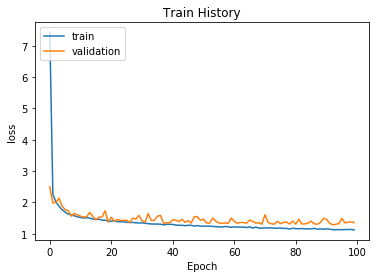

In [25]:
#DL模型訓練
from keras import models
from keras import layers
from keras import optimizers
from sklearn import preprocessing
from keras.layers.core import Dense, Dropout, Activation,Flatten
from keras.layers.recurrent import LSTM
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras import backend as K
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',input_shape=(x1.shape[1],)))
    model.add(layers.Dense(32, activation='relu'))
    #model.add(Dropout(0.1))
    model.add(layers.Dense(1))
    optimizer=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss='mape', optimizer=optimizer, metrics=['mape','mae'])
    return model
def drawLoss(train_history):
    #劃出loss rate變化
    import matplotlib.pyplot as plt
    def show_train_history(train_history,train,validation):
        plt.plot(train_history.history[train])
        plt.plot(train_history.history[validation])
        plt.title('Train History')
        plt.ylabel(train)
        plt.xlabel('Epoch')
        plt.legend(['train', 'validation'], loc='upper left')
        plt.show()
    show_train_history(train_history,'loss','val_loss')
#看訓練資料集符合比賽計分制的得分情況
def checkScore(modelok):
    import seaborn as sns
    predX = modelok.predict(x1)
    predictionX=np.expm1(predX)
    predictionX = pd.DataFrame(predictionX)
    finalAnsA=df[['building_id','building_area','total_price']]
    finalAnsA['newAvg']=predictionX
    finalAnsA['newTotal']=finalAnsA['newAvg']*finalAnsA['building_area']
    finalAnsA['diff']=abs(finalAnsA['newTotal']-finalAnsA['total_price'])
    finalAnsA['errorRate']=finalAnsA['diff']/finalAnsA['total_price']
    okNum=finalAnsA[finalAnsA['errorRate']<=0.1]
    okRate=okNum.shape[0]/predictionX.shape[0]
    print ("訓練集正確率=%s/%s=%s" %(okNum.shape[0], predictionX.shape[0],okNum.shape[0]/predictionX.shape[0])  )
    return predX    
#開始訓練模型
modelok = build_model() 
#設定參數
#若驗證損失下降，則保存模型，以確保最終可以用最佳狀態的模型進行預測。
#early_stopping = EarlyStopping(monitor='val_loss', patience=100, verbose=0,mode='min')
checkpointer = ModelCheckpoint(filepath='tmp/bestWeights.hdf5', verbose=1, save_best_only=True)
#checkpointer = ModelCheckpoint(filepath='data/bestWeights.hdf5', verbose=1, save_best_only=True)
train_history=modelok.fit(X_train, y_train, validation_split=0.1, epochs=100, batch_size=64,callbacks=[checkpointer], verbose=1)
drawLoss(train_history)
#將DL的訓練集預測結果加到S_train中



In [27]:
import tensorflow as tf
modelok = tf.contrib.keras.models.load_model('tmp/bestWeights.hdf5')
trainY = checkScore(modelok)
testY = modelok.predict(tx1)

訓練集正確率=28946/59333=0.4878566733520975


In [37]:
S_train.shape

(59333, 4)

In [38]:
trainY.shape

(59333, 1)

In [30]:
newS_train=np.concatenate((S_train,trainY),axis=1)
newS_test=np.concatenate((S_test,testY),axis=1)

In [41]:
newS_train[0]

array([12.17971982, 12.38821521, 12.44546105, 12.2175827 , 12.21943855])

## 第二層

In [32]:
#model = XGBRegressor(metric = mean_absolute_error, max_depth=20)

model = XGBRegressor(max_depth=20)
model = model.fit(newS_train, y_train)

## 儲存預測結果

In [33]:
y_pred = model.predict(newS_test)
y_pred = np.expm1(y_pred)

In [36]:
#from google.colab import files
#y_pred = pd.DataFrame(y_pred)

finalAns=testDf[['building_id','building_area']]
finalAns['avg']=y_pred
finalAns['total_price']=finalAns['avg']*finalAns['building_area']
finalAns=finalAns.drop(['building_area','avg'], axis = 1)
finalAns.to_csv('submit_test.csv',index=False)
#files.download('submit_test.csv')